# **Tugas Besar 2**
## Kelompok 8:
1. 16521359 - Luthfi Hanif
2. 16521369 - Ahmad Rizki 
3. 16521379 - Muhammad Shulhan
4. 16521389 - George Daniel Nugroho 

## Sumber data: 
**Indonesia's Trending YouTube Video Statistics - Syahrul Hamdani** <br/>
**Link** : ([https://www.kaggle.com/syahrulhamdani/indonesias-trending-youtube-video-statistics](https://www.kaggle.com/syahrulhamdani/indonesias-trending-youtube-video-statistics))
<p> Merupakan datasets Video Trending Youtube pada tahun 2021

### Data utama : trending.csv (119.00 MB)
Sumber data dengan ukuran 49722 baris x 26 kolom
### Data penunjang : category.json (7.66 KB)
referensi category_id dengan category_name yang akan membantu pada pengolahan data selanjutnya.

## **Inisialisasi**

In [123]:
# Mengimport library yang dibutuhkan
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix

# Inisialisasi file csv dan json
file_csv = 'trending.csv'
file_json = 'category.json'

In [124]:
# Inisialisasi dataframe dengan membaca file csv dan json
df = pd.read_csv(file_csv)
category_data = pd.read_json(file_json)

In [125]:
# Membuat list berisi tuple pasangan category_id dan category_name
category_list = []
for i in range(len(category_data['items'])):
    category_list.append((category_data["items"][i]["id"], category_data["items"][i]["snippet"]["title"]))

In [126]:
# Menambahkan kolom "category_name" dan mengisinya sesuai dengan "category_id" pada file json
df.insert(len(df.columns), 'category_name', '')
for i in range(len(df)):
    for j in range(len(category_list)):
        if int(df['category_id'][i]) == int(category_list[j][0]):
            df['category_name'][i] = category_list[j][1]

C:\Users\acer\AppData\Local\Temp/ipykernel_16412/3442547314.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_name'][i] = category_list[j][1]


In [127]:
# Menampilkan 5 data awal
df.head()

,publish_time,channel_id,title,description,thumbnail_url,thumbnail_width,thumbnail_height,channel_name,tags,category_id,...,license_status,allowed_region,blocked_region,view,like,dislike,favorite,comment,trending_time,category_name
0,2021-02-05T09:00:34Z,UCEf_Bc-KVd7onSeifS3py9g,aespa 에스파 'Forever (약속)' MV,"aespa's new single ""Forever"" is out!\nListen a...",NaN,NaN,NaN,SMTOWN,NaN,10,...,True,NaN,NaN,7806846.0,857902.0,24078.0,0,94961.0,2021-02-07 05:46:51.832614+00:00,Music
1,2021-02-04T15:54:08Z,UCYEa4_MC7OFjcWrO6SO-u8g,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,"Jakarta, https://www.tvonenews.com - Ketua umu...",NaN,NaN,NaN,Indonesia Lawyers Club,"['tvone', 'tv one', 'tvonenews', 'indonesia la...",25,...,True,NaN,NaN,885038.0,6765.0,1263.0,0,6365.0,2021-02-07 05:46:51.832649+00:00,News & Politics
2,2021-02-06T03:00:22Z,UCu12RxQjRQyh79YBYvEDkOg,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Road Party Season 2: Cabriolet Challenge\n\nEp...,NaN,NaN,NaN,Motomobi,"['MotoMobi', 'Mobil', 'motor', 'review', 'indo...",2,...,True,NaN,NaN,889708.0,47895.0,532.0,0,8785.0,2021-02-07 05:46:51.832664+00:00,Autos & Vehicles
3,2021-02-05T20:26:08Z,UCCuzDCoI3EUOo_nhCj4noSw,With Windah Basudara & Hans,Join this channel to get access to perks:\nhtt...,NaN,NaN,NaN,yb,NaN,20,...,True,NaN,NaN,1006854.0,91973.0,3967.0,0,12957.0,2021-02-07 05:46:51.832678+00:00,Gaming
4,2021-02-03T23:14:54Z,UC14UlmYlSNiQCBe9Eookf_A,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,"With just two minutes to play, Barça looked to...",NaN,NaN,NaN,FC Barcelona,"['FC Barcelona', 'برشلونة،', 'Fútbol', 'FUTBOL...",17,...,True,NaN,NaN,6275035.0,218131.0,4289.0,0,12799.0,2021-02-07 05:46:51.832730+00:00,Sports


## **Karakteristik Data**

In [128]:
# Menampilkan ukuran dari data
print('Jumlah Baris :', len(df))
print('Jumlah Kolom :', len(df.columns))

Jumlah Baris : 49722
Jumlah Kolom : 27


In [129]:
# Menampilkan banyak data unik dari tiap kolom
for i in range(len(df.columns)):
    print(f'Data unik pada kolom {df.columns[i]} ada sebanyak {len(df.iloc[:,i].unique())}')

Data unik pada kolom publish_time ada sebanyak 10157
Data unik pada kolom channel_id ada sebanyak 2043
Data unik pada kolom title ada sebanyak 10405
Data unik pada kolom description ada sebanyak 9588
Data unik pada kolom thumbnail_url ada sebanyak 1
Data unik pada kolom thumbnail_width ada sebanyak 1
Data unik pada kolom thumbnail_height ada sebanyak 1
Data unik pada kolom channel_name ada sebanyak 2063
Data unik pada kolom tags ada sebanyak 6854
Data unik pada kolom category_id ada sebanyak 15
Data unik pada kolom live_status ada sebanyak 1
Data unik pada kolom local_title ada sebanyak 10405
Data unik pada kolom local_description ada sebanyak 9588
Data unik pada kolom duration ada sebanyak 2733
Data unik pada kolom dimension ada sebanyak 1
Data unik pada kolom definition ada sebanyak 2
Data unik pada kolom caption ada sebanyak 2
Data unik pada kolom license_status ada sebanyak 2
Data unik pada kolom allowed_region ada sebanyak 58
Data unik pada kolom blocked_region ada sebanyak 122
Da

In [130]:
# Mencari range dari tiap kolom dengan tipe data kuantitatif (numerik dan time-series)
kuantitatif = ['trending_time', 'publish_time', 'view', 'like', 'dislike', 'comment']
index = 1
for i in kuantitatif:
    print(f'{index}. Kolom {i} memiliki range : ({df[i].min()} - {df[i].max()}) ')
    index += 1
print()

1. Kolom trending_time memiliki range : (2021-02-07 05:46:51.832614+00:00 - 2021-11-19 11:29:39.271647+00:00) 
2. Kolom publish_time memiliki range : (2021-01-11T12:21:56Z - 2021-11-19T02:45:03Z) 
3. Kolom view memiliki range : (15282.0 - 335957560.0) 
4. Kolom like memiliki range : (16.0 - 17005260.0) 
5. Kolom dislike memiliki range : (0.0 - 392340.0) 
6. Kolom comment memiliki range : (0.0 - 7195733.0) 



In [131]:
# Mencari member category dari kolom dengan tipe data kategorikal
print('Member pada kolom category_name dan category_id :')
print('No. category_name - category_id')
index = 1
for i in range(len(df['category_name'].unique())):
    print(f"{index}. {df['category_name'].unique()[i]} - {df['category_id'].unique()[i]}")
    index += 1

Member pada kolom category_name dan category_id :
No. category_name - category_id
1. Music - 10
2. News & Politics - 25
3. Autos & Vehicles - 2
4. Gaming - 20
5. Sports - 17
6. Entertainment - 24
7. Comedy - 23
8. People & Blogs - 22
9. Howto & Style - 26
10. Nonprofits & Activism - 29
11. Film & Animation - 1
12. Education - 27
13. Science & Technology - 28
14. Pets & Animals - 15
15. Travel & Events - 19


In [132]:
# Menampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49722 entries, 0 to 49721
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   publish_time       49722 non-null  object 
 1   channel_id         49722 non-null  object 
 2   title              49722 non-null  object 
 3   description        48049 non-null  object 
 4   thumbnail_url      0 non-null      float64
 5   thumbnail_width    0 non-null      float64
 6   thumbnail_height   0 non-null      float64
 7   channel_name       49722 non-null  object 
 8   tags               43739 non-null  object 
 9   category_id        49722 non-null  int64  
 10  live_status        49722 non-null  object 
 11  local_title        49722 non-null  object 
 12  local_description  48049 non-null  object 
 13  duration           49722 non-null  object 
 14  dimension          49722 non-null  object 
 15  definition         49722 non-null  object 
 16  caption            497

## **Data Cleansing**

In [133]:
# Menghapus kolom yang tidak dibutuhkan
df.drop('channel_id', inplace=True, axis=1)         # tidak dibutuhkan
df.drop('description', inplace=True, axis=1)        # tidak dibutuhkan
df.drop('thumbnail_url', inplace=True, axis=1)      # tidak dibutuhkan
df.drop('thumbnail_width', inplace=True, axis=1)    # tidak dibutuhkan
df.drop('thumbnail_height', inplace=True, axis=1)   # tidak dibutuhkan
df.drop('tags', inplace=True, axis=1)               # tidak dibutuhkan
df.drop('category_id', inplace=True, axis=1)        # digantikan category_name
df.drop('live_status', inplace=True, axis=1)        # tidak dibutuhkan
df.drop('local_title', inplace=True, axis=1)        # tidak dibutuhkan
df.drop('local_description', inplace=True, axis=1)  # tidak dibutuhkan
df.drop('duration', inplace=True, axis=1)           # tidak dibutuhkan
df.drop('dimension', inplace=True, axis=1)          # tidak dibutuhkan
df.drop('definition', inplace=True, axis=1)         # tidak dibutuhkan
df.drop('allowed_region', inplace=True, axis=1)     # tidak dibutuhkan
df.drop('blocked_region', inplace=True, axis=1)     # tidak dibutuhkan
df.drop('favorite', inplace=True, axis=1)           # tidak dibutuhkan



In [193]:
# Mengubah tipe data dari kolom publish_time dan trending_time menjadi time series
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%SZ')
df['trending_time'] = pd.to_datetime(df['trending_time'], format='%Y-%m-%d %H:%M:%S.%f+00:00')
df['trending_time'] = pd.to_datetime(df['trending_time'])
df['publish_time'] = pd.to_datetime(df['publish_time'])

In [194]:
# Menampilkan 5 data awal setelah di bersihkan
df.head()

,publish_time,title,channel_name,caption,license_status,view,like,dislike,comment,trending_time,category_name
0,2021-02-05 09:00:34,aespa 에스파 'Forever (약속)' MV,SMTOWN,True,True,7806846.0,857902.0,24078.0,94961.0,2021-02-07 05:46:51.832614,Music
1,2021-02-04 15:54:08,[FULL] Siapa di Balik Kudeta AHY? | Dua Sisi t...,Indonesia Lawyers Club,False,True,885038.0,6765.0,1263.0,6365.0,2021-02-07 05:46:51.832649,News & Politics
2,2021-02-06 03:00:22,CABRIOLET CHALLENGE: TANTANGAN MENGGODA (7/12),Motomobi,False,True,889708.0,47895.0,532.0,8785.0,2021-02-07 05:46:51.832664,Autos & Vehicles
3,2021-02-05 20:26:08,With Windah Basudara & Hans,yb,False,True,1006854.0,91973.0,3967.0,12957.0,2021-02-07 05:46:51.832678,Gaming
4,2021-02-03 23:14:54,🤯 LATE COMEBACK DRAMA! | HIGHLIGHTS | Granada ...,FC Barcelona,False,True,6275035.0,218131.0,4289.0,12799.0,2021-02-07 05:46:51.832730,Sports


In [136]:
# Menampilkan info data yang telah dibersihkan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49722 entries, 0 to 49721
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   publish_time    49722 non-null  datetime64[ns]
 1   title           49722 non-null  object        
 2   channel_name    49722 non-null  object        
 3   caption         49722 non-null  bool          
 4   license_status  49722 non-null  bool          
 5   view            49714 non-null  float64       
 6   like            49136 non-null  float64       
 7   dislike         49136 non-null  float64       
 8   comment         49474 non-null  float64       
 9   trending_time   49722 non-null  datetime64[ns]
 10  category_name   49722 non-null  object        
dtypes: bool(2), datetime64[ns](2), float64(4), object(3)
memory usage: 3.5+ MB


## **Statistik** 

### Statistik Umum Atribut Numerik

In [137]:
# Menampilkan informasi singkat mengenai statistik dari atribut numerik
df.describe()

,view,like,dislike,comment
count,4.971400e+04,4.913600e+04,49136.000000,4.947400e+04
mean,3.608864e+06,1.788336e+05,4389.812907,1.901616e+04
std,1.239547e+07,6.920405e+05,16145.960201,1.778035e+05
min,1.528200e+04,1.600000e+01,0.000000,0.000000e+00
25%,3.353705e+05,7.732750e+03,186.000000,5.760000e+02
50%,9.111640e+05,2.422200e+04,570.000000,1.949000e+03
75%,2.395486e+06,8.799125e+04,1988.000000,6.401000e+03
max,3.359576e+08,1.700526e+07,392340.000000,7.195733e+06


In [138]:
# Menampilkan nilai rata-rata dari atribut numerik
df.mean(numeric_only= True)

caption           1.331604e-01
license_status    9.323237e-01
view              3.608864e+06
like              1.788336e+05
dislike           4.389813e+03
comment           1.901616e+04
dtype: float64

In [139]:
# Menampilkan nilai standard deviasi dari atribut numerik
df.std(numeric_only= True)

caption           3.397514e-01
license_status    2.511921e-01
view              1.239547e+07
like              6.920405e+05
dislike           1.614596e+04
comment           1.778035e+05
dtype: float64

In [140]:
# Menampilkan nilai ekstremum minimum dari atribut numerik
df.min(numeric_only= True)

caption             False
license_status      False
view              15282.0
like                 16.0
dislike               0.0
comment               0.0
dtype: object

In [141]:
# Menampilkan nilai ekstremum maksimum dari atribut numerik
df.max(numeric_only= True)

caption                  True
license_status           True
view              335957560.0
like               17005260.0
dislike              392340.0
comment             7195733.0
dtype: object

In [142]:
# Menampilkan persentil dari atribut numerik
persentil = [0.1, 0.25, 0.5, 0.75, 0.9]
kolom = ['view', 'like', 'dislike', 'comment']
for i in persentil:
    print(f'Persentil {i*100}% : ')
    for j in kolom:
        print(f'- {j} : {df[j].quantile(i)}')

Persentil 10.0% : 
- view : 132341.30000000002
- like : 2844.5
- dislike : 72.0
- comment : 180.0
Persentil 25.0% : 
- view : 335370.5
- like : 7732.75
- dislike : 186.0
- comment : 576.0
Persentil 50.0% : 
- view : 911164.0
- like : 24222.0
- dislike : 570.0
- comment : 1949.0
Persentil 75.0% : 
- view : 2395486.25
- like : 87991.25
- dislike : 1988.0
- comment : 6401.0
Persentil 90.0% : 
- view : 6421066.600000004
- like : 328238.5
- dislike : 7273.5
- comment : 20287.0


### Statistik Data Channel

In [143]:
# Menampilkan daftar 10 channel dengan frekuensi terbesar (paling sering masuk trending)
df['channel_name'].value_counts()[:10]

TRANS7 OFFICIAL                 470
Deddy Corbuzier                 437
Indosiar                        322
RCTI - LAYAR DRAMA INDONESIA    320
WARINTIL OFFICIAL               297
SMTOWN                          291
KOMPASTV                        283
Philip Mantofa                  279
Muse Indonesia                  275
BANGTANTV                       268
Name: channel_name, dtype: int64

### Statistik Data Category

In [144]:
# Mengelompookan data berdasarkan atribut category_name
category_df = df.groupby('category_name').sum()
category_df

,caption,license_status,view,like,dislike,comment
category_name,,,,,,
Autos & Vehicles,26,771,4.504786e+08,1.206343e+07,294372.0,1643274.0
Comedy,60,1838,1.566773e+10,4.847591e+08,23949590.0,8566764.0
Education,3,398,1.192308e+09,1.034056e+07,309406.0,827562.0
Entertainment,1349,13027,3.886751e+10,1.723703e+09,53080232.0,125392611.0
Film & Animation,219,1481,3.905947e+09,1.287586e+08,3929756.0,9045719.0
Gaming,98,1728,4.268686e+09,1.747565e+08,6982238.0,13323754.0
Howto & Style,67,1383,8.504195e+09,2.568745e+08,15283565.0,3933801.0
Music,3773,11706,7.025038e+10,4.850383e+09,68859852.0,706899097.0
News & Politics,86,4106,6.205681e+09,6.639268e+07,4826219.0,22737947.0


In [145]:
# Menampilkan frekuensi dari category video pernah yang masuk trending
df['category_name'].value_counts()

Entertainment            14003
Music                    12713
People & Blogs            4839
News & Politics           4384
Sports                    4230
Gaming                    2082
Comedy                    1939
Film & Animation          1553
Howto & Style             1418
Autos & Vehicles           772
Education                  430
Science & Technology       427
Nonprofits & Activism      377
Pets & Animals             280
Travel & Events            275
Name: category_name, dtype: int64

### Statistik Data View

In [146]:
# Menampilkan banyak view paling banyak dan paling sedikit dari video yang pernah masuk trending
print(f'View paling banyak : {df["view"].max()}')
print(f'View paling sedikit : {df["view"].min()}')

View paling banyak : 335957560.0
View paling sedikit : 15282.0


In [147]:
# Menampilkan data video dengan view terbesar
df.loc[df['view'] == df['view'].max()]

,publish_time,title,channel_name,caption,license_status,view,like,dislike,comment,trending_time,category_name
17506,2021-05-21 03:46:13,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,True,True,335957560.0,17005260.0,225569.0,7195733.0,2021-06-11 06:01:32.827397,Music


In [148]:
# Menampilkan data video dengan view terkecil
df.loc[df['view'] == df['view'].min()]

,publish_time,title,channel_name,caption,license_status,view,like,dislike,comment,trending_time,category_name
26079,2021-07-23 12:18:18,KRONOLOGI | Kasus Pembunuhan di Jalan Subur ...,TRIBUNBALI,False,True,15282.0,115.0,8.0,33.0,2021-07-24 06:02:49.630446,News & Politics


### Statistik Data Like

In [149]:
# Menampilkan banyak like paling banyak dan paling sedikit dari video yang pernah masuk trending
print(f'Like paling banyak : {df["like"].max()}')
print(f'Like paling sedikit : {df["like"].min()}')

Like paling banyak : 17005260.0
Like paling sedikit : 16.0


In [150]:
# Menampilkan data video dengan like terbesar
df.loc[df['like'] == df['like'].max()]

,publish_time,title,channel_name,caption,license_status,view,like,dislike,comment,trending_time,category_name
17506,2021-05-21 03:46:13,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,True,True,335957560.0,17005260.0,225569.0,7195733.0,2021-06-11 06:01:32.827397,Music


In [151]:
# Menampilkan data video dengan like terkecil
df.loc[df['like'] == df['like'].min()]

,publish_time,title,channel_name,caption,license_status,view,like,dislike,comment,trending_time,category_name
1582,2021-02-10 03:01:01,Scandal I Teaser I Vidio,Vidio,False,True,108490.0,16.0,0.0,1.0,2021-02-12 12:38:34.047485,Entertainment


### Statistik Data Dislike

In [152]:
# Menampilkan banyak dislike paling banyak dan paling sedikit dari video yang pernah masuk trending
print(f'Dislike paling banyak : {df["dislike"].max()}')
print(f'Dislike paling sedikit : {df["dislike"].min()}')

Dislike paling banyak : 392340.0
Dislike paling sedikit : 0.0


In [153]:
# Menampilkan data video dengan dislike terbesar
df.loc[df['dislike'] == df['dislike'].max()]

,publish_time,title,channel_name,caption,license_status,view,like,dislike,comment,trending_time,category_name
8466,2021-03-26 04:00:14,Lil Nas X - MONTERO (Call Me By Your Name) (Of...,LilNasXVEVO,False,True,101031488.0,3923525.0,392340.0,687773.0,2021-04-07 14:22:57.924069,Music


In [154]:
# Menampilkan data video dengan dislike terkecil
df.loc[df['dislike'] == df['dislike'].min()]

,publish_time,title,channel_name,caption,license_status,view,like,dislike,comment,trending_time,category_name
1582,2021-02-10 03:01:01,Scandal I Teaser I Vidio,Vidio,False,True,108490.0,16.0,0.0,1.0,2021-02-12 12:38:34.047485,Entertainment
1721,2021-02-10 03:01:01,Scandal I Teaser I Vidio,Vidio,False,True,133493.0,20.0,0.0,1.0,2021-02-13 04:44:35.206614,Entertainment
1974,2021-02-10 03:01:01,Scandal I Teaser I Vidio,Vidio,False,True,162930.0,22.0,0.0,1.0,2021-02-14 06:37:10.964375,Entertainment
46919,2021-10-28 00:00:06,Susah Sinyal The Series | Official Trailer | D...,DisneyPlus Hotstar Indonesia,False,True,344092.0,92.0,0.0,5.0,2021-11-05 06:01:23.223809,Film & Animation


### Statistik Data Comment

In [155]:
# Menampilkan banyak comment paling banyak dan paling sedikit dari video yang pernah masuk trending
print(f'Comment paling banyak : {df["comment"].max()}')
print(f'Comment paling sedikit : {df["comment"].min()}')

Comment paling banyak : 7195733.0
Comment paling sedikit : 0.0


In [156]:
# Menampilkan data video dengan comment terbesar
df.loc[df['comment'] == df['comment'].max()]

,publish_time,title,channel_name,caption,license_status,view,like,dislike,comment,trending_time,category_name
17506,2021-05-21 03:46:13,BTS (방탄소년단) 'Butter' Official MV,HYBE LABELS,True,True,335957560.0,17005260.0,225569.0,7195733.0,2021-06-11 06:01:32.827397,Music


In [157]:
# Menampilkan data video dengan comment terkecil
df.loc[df['comment'] == df['comment'].min()]

,publish_time,title,channel_name,caption,license_status,view,like,dislike,comment,trending_time,category_name
56,2021-01-24 10:03:02,Putri Panggung,Various Artists - Topic,False,True,282108.0,257.0,134.0,0.0,2021-02-07 05:46:51.833503,Music
105,2021-02-04 14:03:11,Every Krabby Patty Ranked by GROSSNESS! 🍔 | Sp...,SpongeBob SquarePants Official,True,True,827076.0,8172.0,889.0,0.0,2021-02-07 05:46:51.834048,Film & Animation
166,2021-01-29 14:00:07,SpongeBob & Patrick Sand Castle War IRL! 🏰,SpongeBob SquarePants Official,False,True,2300564.0,15962.0,2433.0,0.0,2021-02-07 05:46:51.834716,Film & Animation
253,2021-01-24 10:03:02,Putri Panggung,Various Artists - Topic,False,True,350071.0,306.0,162.0,0.0,2021-02-07 12:15:58.377994,Music
282,2021-02-05 16:03:32,DJ TIKTOK VIRAL 2021 🧡 DJ FULL BASS REMIX TERB...,BMusic 4k.,False,True,109457.0,693.0,55.0,0.0,2021-02-07 12:15:58.378555,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...
48763,2021-11-02 07:12:48,Kecewa (Koplo Version),Era Syaqira - Topic,False,True,729466.0,1623.0,688.0,0.0,2021-11-15 06:02:48.687573,Music
48964,2021-11-02 07:12:48,Kecewa (Koplo Version),Era Syaqira - Topic,False,True,979656.0,2144.0,923.0,0.0,2021-11-16 06:03:16.803072,Music
49160,2021-11-02 07:12:48,Kecewa (Koplo Version),Era Syaqira - Topic,False,True,1255171.0,2689.0,1142.0,0.0,2021-11-17 06:02:48.409659,Music
49365,2021-11-02 07:12:48,Kecewa (Koplo Version),Era Syaqira - Topic,False,True,1579221.0,3265.0,1412.0,0.0,2021-11-18 06:00:46.302369,Music


### Statistik Data Publish Time

In [190]:
# Mengelompookan data berdasarkan hari pada atribut publish_time
publish_time_df = df["publish_time"].apply(lambda hari: hari.strftime('%A')).value_counts()
publish_time_df


Friday       8686
Saturday     7530
Wednesday    7263
Monday       7031
Thursday     6595
Sunday       6416
Tuesday      6201
Name: publish_time, dtype: int64

### Statistik Data Trending Time

In [159]:
# Mengelompookan data berdasarkan bulan trending
trending_time_df = df.groupby((df.trending_time.dt.month)).sum()
trending_time_df

,caption,license_status,view,like,dislike,comment
trending_time,,,,,,
2,727,4928,1.081085e+10,5.349361e+08,11727417.0,61021238.0
3,281,1823,4.813490e+09,2.663372e+08,5944305.0,32220744.0
4,593,4043,1.154592e+10,5.801886e+08,13683708.0,87763009.0
5,556,3651,1.928445e+10,8.997000e+08,21050992.0,150423284.0
6,889,5626,2.870995e+10,1.300701e+09,32192918.0,216977781.0
7,837,5834,2.308036e+10,1.158822e+09,23432800.0,118082252.0
8,934,5743,1.768957e+10,8.657957e+08,20169848.0,63934061.0
9,735,5522,2.386391e+10,1.373975e+09,30752567.0,113116101.0
10,688,5723,2.527053e+10,1.187630e+09,35528896.0,69631413.0


## **Visualisasi**

### 10 Channel yang paling sering masuk Trending
(*Perbandingan kategori*)

<AxesSubplot:title={'center':'10 Channel yang paling sering masuk Trending'}>

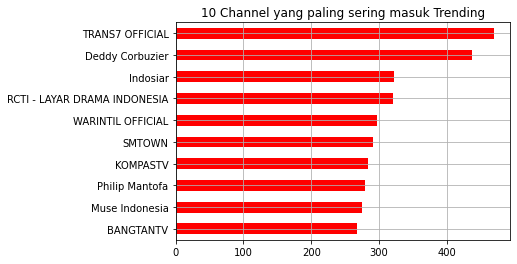

In [160]:
# diagram horizontal bar, channel yang paling sering masuk trending
df['channel_name'].value_counts()[:10].sort_values().plot(kind='barh', title='10 Channel yang paling sering masuk Trending', grid=0.4, color='r')

<p>Visualisasi data diatas menunjukkan channel yang paling sering masuk Trending yaitu TRANS7 OFFICIAL</p>
<p>Berdasarkan data, channel yang sering masuk Trending biasanya adalah channel yang kontennya rutin dan banyak penggemar, seperti channel bawaan TV, K-POP, dll.

### Perbandingan setiap Kategori video yang sering masuk Trending
(*Perbandingan kategori*)

Text(0.5, 1.0, 'Kategori video yang sering masuk Trending')

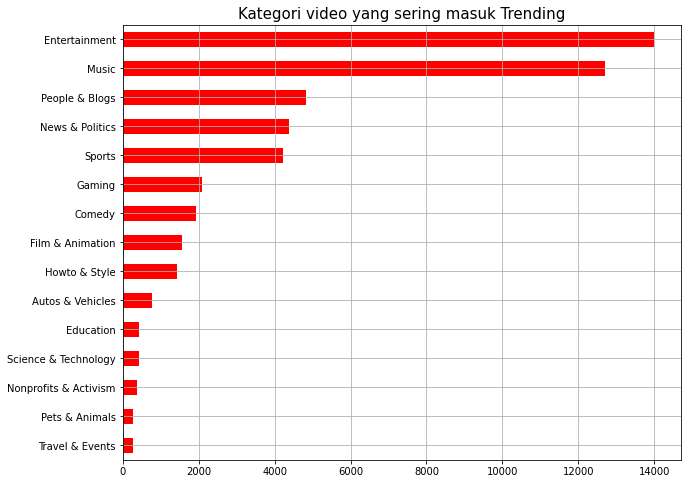

In [161]:
# diagram horizontal bar, kategori video yang paling sering masuk trendig
df['category_name'].value_counts().sort_values().plot(kind='barh', figsize=(10,8), grid=0.4, color='red')
plt.title('Kategori video yang sering masuk Trending', size=15)

<p>Diagram diatas menunjukkan video yang sering masuk trending ditempati oleh video dengan kategori Entertainment, Music, dan People&Blogs. Bisa jadi, masyarakat indonesia menyukai hal-hal kontroversial yang biasanya disajikan oleh video berkategori Entertainment</p>
<p>Sedangkan, video yang paling jarang masuk trending yaitu video dengan kategori Travel&Events, Pets&Animals, dan Nonprofit&Activism. Bahkan edukasi dan Science&Technology masih berada diurutan lumayan bawah, yang mengindikasikan kurangnya minat penduduk Indonesia akan hal itu.</p>

### Perbandingan Jumlah View setiap Kategori per Bulan
(*Penampilan perubahan terhadap waktu*)

<AxesSubplot:title={'center':'Perbandingan Jumlah View setiap Kategori'}, xlabel='bulan', ylabel='Jumlah View'>

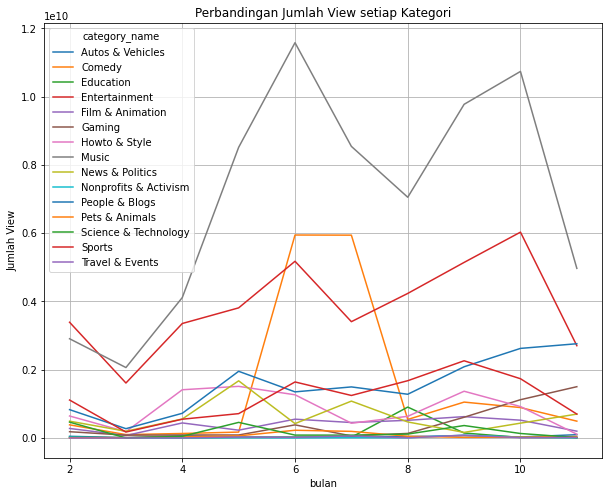

In [162]:
# diagram garis, perbandingan jumlah view tiap kategori per Bulan
bulan_category = df.groupby([df['trending_time'].dt.month, 'category_name'])['view']
bulan_category.sum().unstack().plot(kind='line', figsize = (10,8), xlabel='bulan', ylabel='Jumlah View', title='Perbandingan Jumlah View setiap Kategori', grid=0.4)

Dari diagram diatas dapat dilihat, kategori Music sangat mendominasi Trending pada setiap bulannya. Kecuali pada bulan januari dan februari yang didominasi oleh Entertainment, dan pada bulan juni yang didominasi oleh kategori Comedy.

### Penggunaan Youtube Warga Indonesia per bulan
(*Penampilan perubahan terhadap waktu*)


<AxesSubplot:title={'center':'Penggunaan Youtube Warga Indonesia per bulan'}, xlabel='Bulan', ylabel='View'>

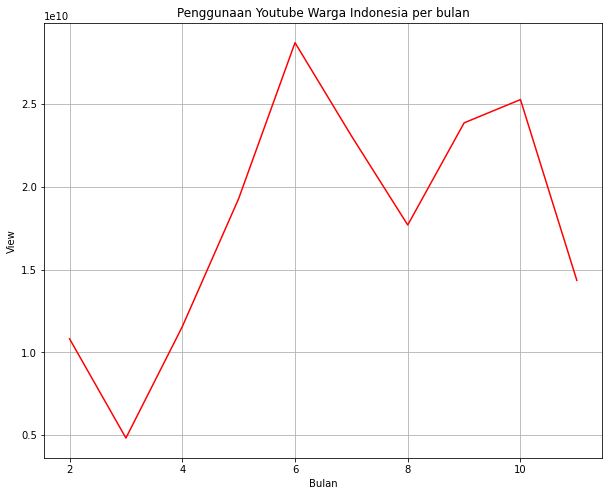

In [163]:
# Penggunaan Youtube penduduk indonesia
bulan = df.groupby(df['trending_time'].dt.month)
bulan['view'].sum().plot(kind='line', grid=0.4, title='Penggunaan Youtube Warga Indonesia per bulan', xlabel= 'Bulan', ylabel='View', figsize=(10,8), color='r')

Dari diagram diatas, dapat dilihat penggunaan youtube oleh penduduk Indonesia paling tinggi yaitu pada bulan Mei

### Perbandingan data per bulannya
(*Penampilan perubahan terhadap waktu*)

<AxesSubplot:title={'center':'Perbandingan Data per Bulan'}, xlabel='Bulan'>

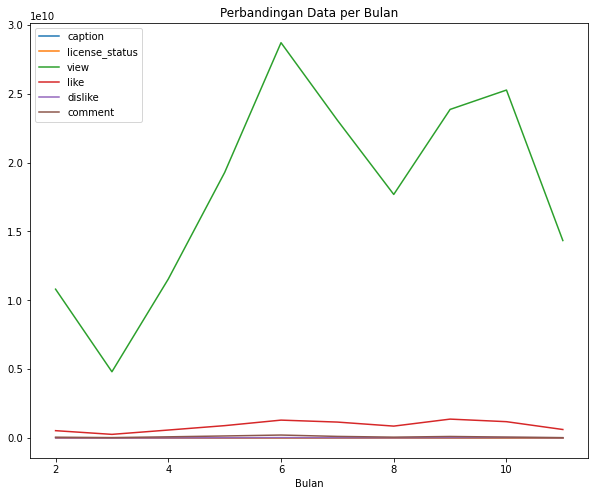

In [164]:
# diagram garis perbandingan tiap data per bulan
bulan = df.groupby(df['trending_time'].dt.month)
bulan.sum().plot(kind='line', title= 'Perbandingan Data per Bulan', figsize =(10,8), xlabel='Bulan')

<AxesSubplot:title={'center':'Perbandingan Data per Bulan'}, ylabel='Bulan'>

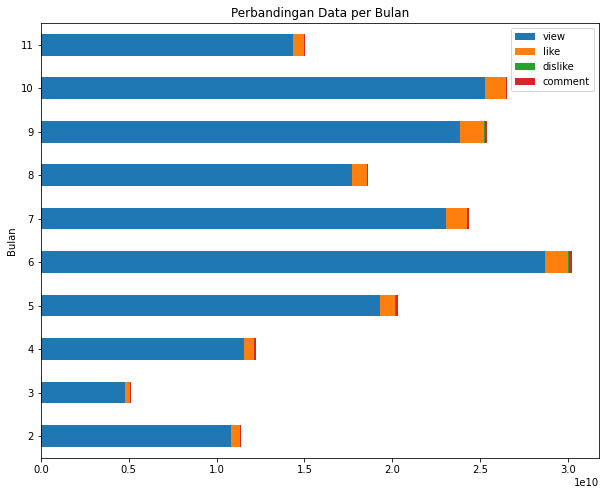

In [165]:
# diagram batang horizontal, perbandingan tiap data per bulan
bulan[['view', 'like', 'dislike', 'comment']].sum().plot(kind='barh', title= 'Perbandingan Data per Bulan',stacked =True ,figsize =(10,8), xlabel='Bulan')

<AxesSubplot:title={'center':'Perbandingan Data per Bulan'}, ylabel='Bulan'>

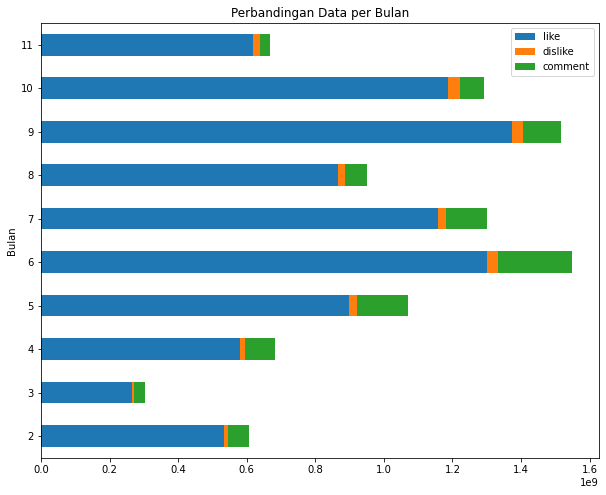

In [166]:
# diagram batang horizontal, perbandingan tiap data per bulan selain view
bulan[['like', 'dislike', 'comment']].sum().plot(kind='barh', title= 'Perbandingan Data per Bulan',stacked =True ,figsize =(10,8), xlabel='Bulan')

Dari grafik tersebut dapat dilihat nilai views selalu jauh dari nilai lainnya, ini dapat mengindikasikan kurangnya inisiatif penonton video untuk memberikan rating (like maupun dislike) maupun komen. Selain itu dapat dilihat secara garis besar jumlah penonton video youtube paling banyak (khususnya untuk trending) adalah pada Juni 2021.
<p>Jika kita lihat tanpa views, proporsi like melebihi comment count dan dislikes digabungkan. Bisa  dikatakan seorang lebih menilai suatu video bila merasa video itu bagus dibandingkan merasa ingin dislike maupun memberikan komentar.

### Perbandingan Jumlah Views setiap Kategori
(*Penampilan Hierarki dan Hubungan Keseluruhan-Bagian*)

Text(0.5, 1.0, 'Perbandingan Jumlah View setiap Kategori')

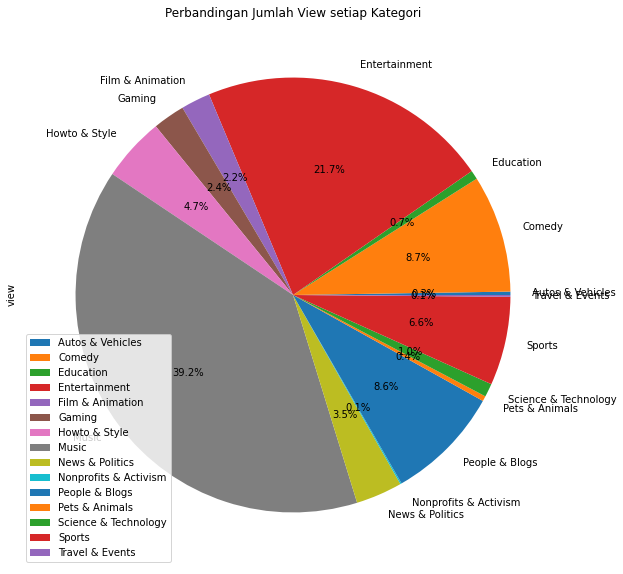

In [167]:
df.groupby('category_name')['view'].sum().plot(kind='pie', legend=True, figsize=(10,10), autopct='%1.1f%%')
plt.title(label ='Perbandingan Jumlah View setiap Kategori')

Dari data ini, ditemukan bahwa kategori dengan jumlah views paling banyak yaitu kategori Music, diikuti dengan kategori Entertainment. Menununjukkan penduduk Indonesia sangat menggemari musik.

### Perbandingan Jumlah View, Like, Comment, dan Dislike setiap Kategori
(*Penampilan Hierarki dan Hubungan Keseluruhan-Bagian*)

Text(0.5, 1.0, 'Perbandingan Jumlah View, Like, Comment, dan Dislike setiap Kategori')

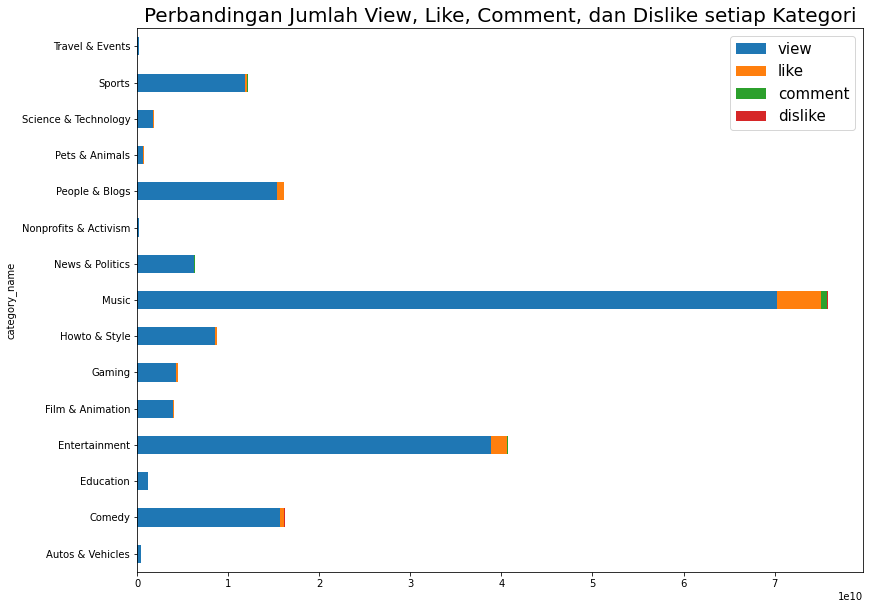

In [168]:
df.groupby('category_name')[['view', 'like', 'comment', 'dislike']].sum().plot(kind='barh', figsize=(13,10), stacked = True)
plt.legend(fontsize=15)
plt.title(label='Perbandingan Jumlah View, Like, Comment, dan Dislike setiap Kategori', fontsize = 20)

Text(0.5, 1.0, 'View')

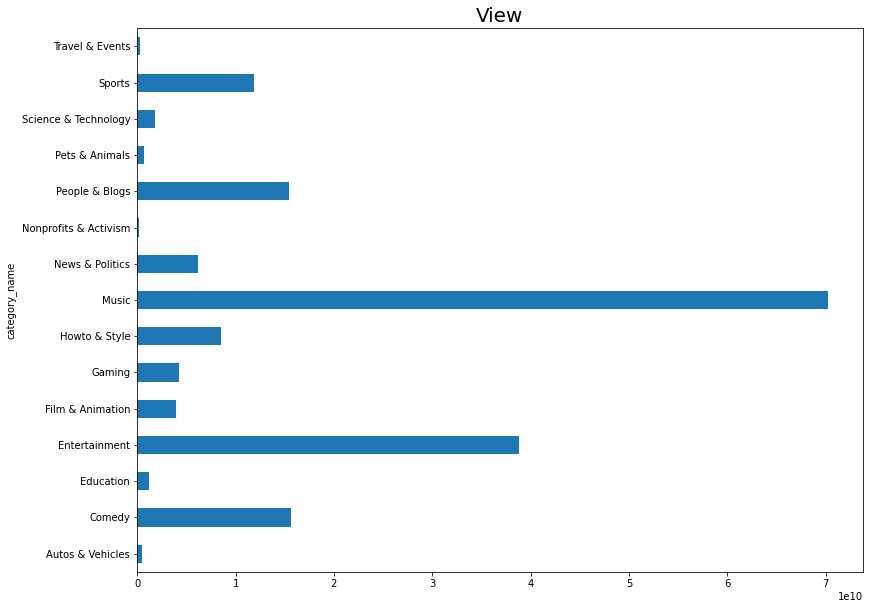

In [169]:
# View
df.groupby('category_name')['view'].sum().plot(kind='barh', figsize=(13,10))
plt.title(label='View', fontsize = 20)


Text(0.5, 1.0, 'Like')

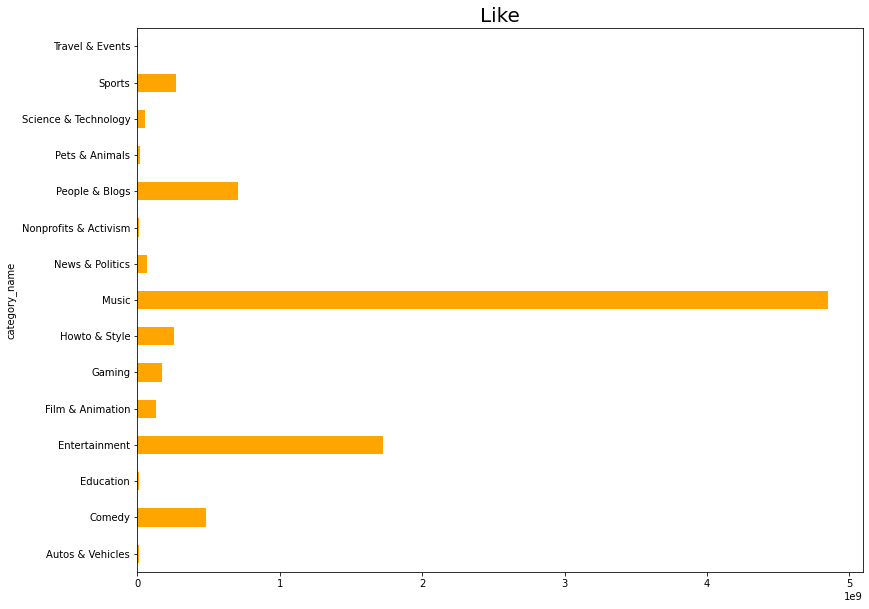

In [170]:
# Like
df.groupby('category_name')['like'].sum().plot(kind='barh', figsize=(13,10), color='orange')
plt.title(label='Like', fontsize = 20)

Text(0.5, 1.0, 'Comment')

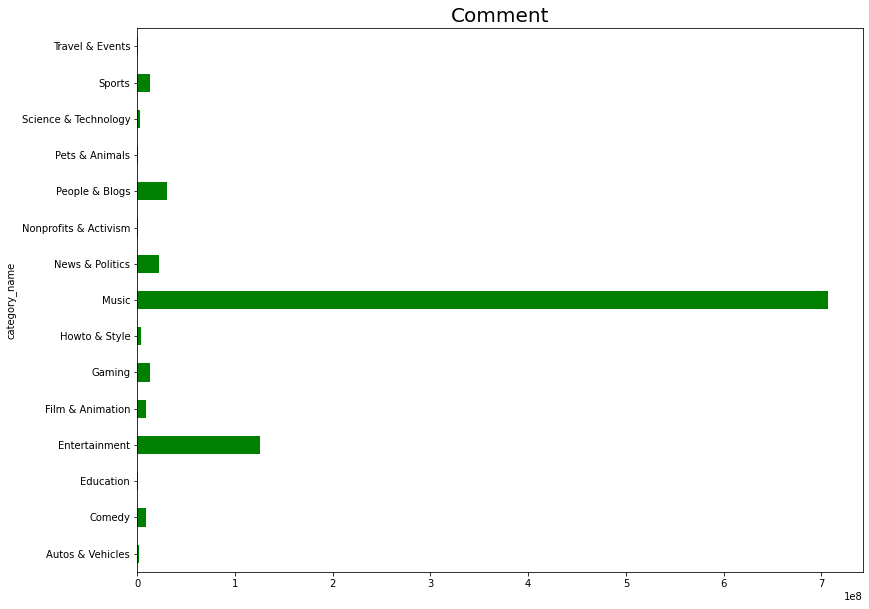

In [171]:
# Comment
df.groupby('category_name')['comment'].sum().plot(kind='barh', figsize=(13,10), color='g')
plt.title(label='Comment', fontsize = 20)


Text(0.5, 1.0, 'Dislike')

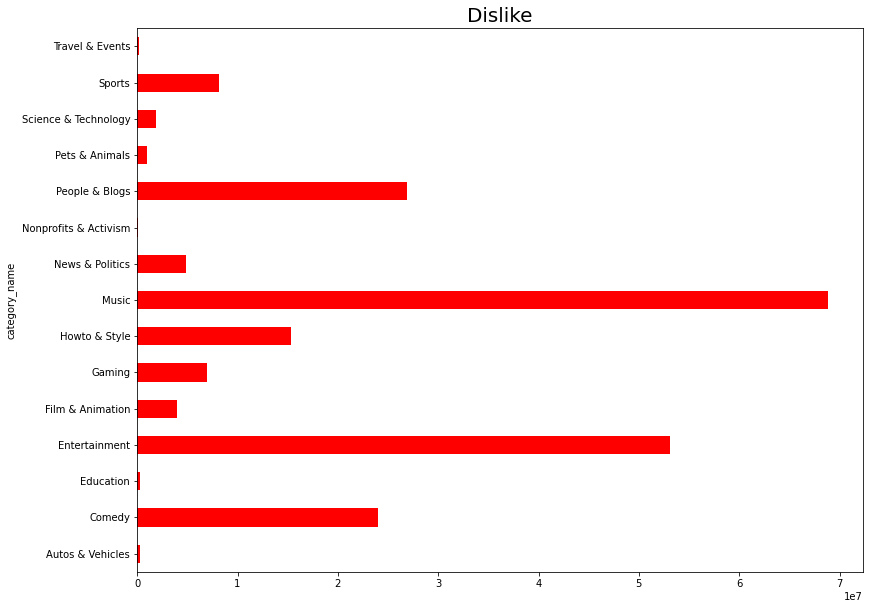

In [172]:
# Dislike
df.groupby('category_name')['dislike'].sum().plot(kind='barh', figsize=(13,10), color='r')
plt.title(label='Dislike', fontsize = 20)


Pada grafik diatas, terlihat perbandingan banyak views, likes, dan comment_count pada setiap kategori berbeda jauh. Dengan demikian, ditemukan insight bahwa penonton Youtube dominan hanya menontonvideo saja, sangat jarang reaksi berupa like dan comment. Selain itu, ditemukan pula pada kategori “Entertainment”, meskipun sedikit, terlihat kuantitas dislikes yang cukup dominan dibanding dengan kuantitas likenya, yang sekilas tidak terlihat. <p>Dengan demikian, ditemukan insight bahwa pada kolom “Entertainment” cenderung terdapat aktivitas dislike yang menonjol daripada kategori lain. Hal ini dapat disebabkan karena pada kategori entertainment terdapat berbagai video kontroversial yang menyebabkan banyak dislikes. Ini bisa juga disebabkan oleh haters suatu video yang suka men-dislike video dari selebriti tertentu. 

### Hubungan antar Data
(*Plotting Relationship*)

Koefisien korelasi antara view dan like adalah 0.8747731916358977


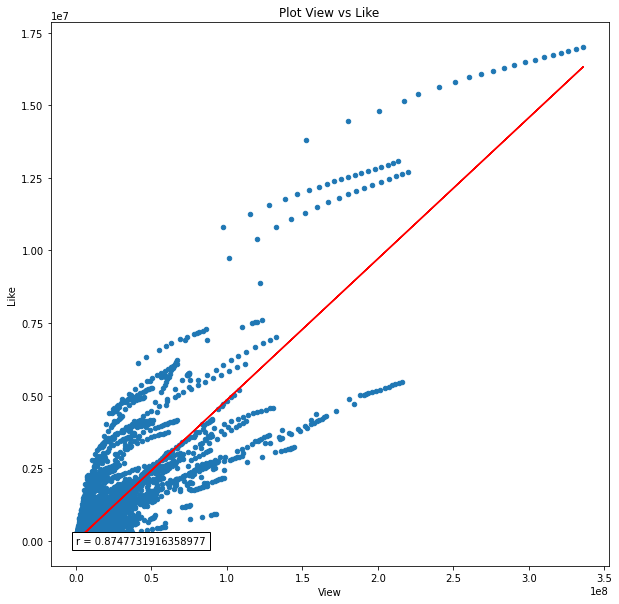

In [173]:
# Scatter plot hubungan view dan like
df['view'] = df['view'].fillna(0)
df['like'] = df['like'].fillna(0)

x = df["view"].values.reshape(-1,1)
y = df["like"].values.reshape(-1,1)

regresi = LinearRegression().fit(x,y)
hasil = regresi.predict(x)
df.plot(kind='scatter', x='view', y='like', figsize = (10,10))
plt.text(2, 0.25, f'r = {df["view"].corr(df["like"])}', bbox=dict(facecolor='white'), va='center')
plt.xlabel("View")
plt.ylabel("Like")
plt.title("Plot View vs Like")
plt.plot(x,hasil, color="red")
print("Koefisien korelasi antara view dan like adalah " + str(df["view"].corr(df["like"])))

Koefisien korelasi antara view dan dislike adalah 0.8006385455623405


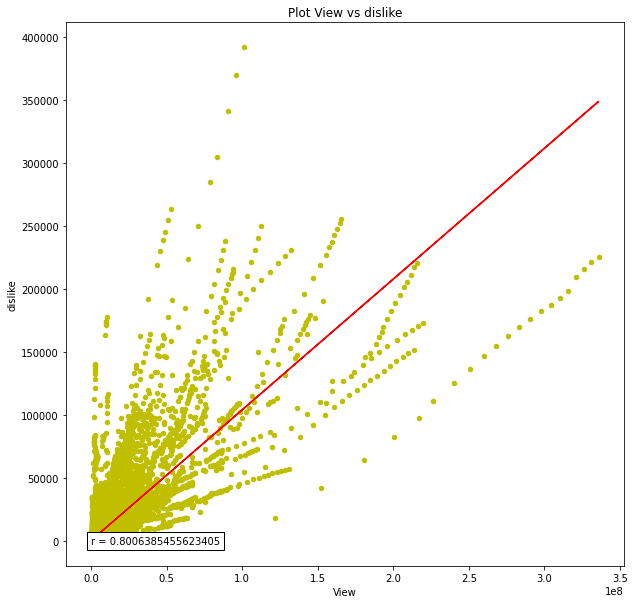

In [174]:
# Scatter plot hubungan view dan dislike
df['view'] = df['view'].fillna(0)
df['dislike'] = df['dislike'].fillna(0)

x = df["view"].values.reshape(-1,1)
y = df["dislike"].values.reshape(-1,1)

regresi = LinearRegression().fit(x,y)
hasil = regresi.predict(x)
df.plot(kind='scatter', x='view', y='dislike', figsize = (10,10), color='y')
plt.text(2, 0.25, f'r = {df["view"].corr(df["dislike"])}', bbox=dict(facecolor='white'), va='center')
plt.xlabel("View")
plt.ylabel("dislike")
plt.title("Plot View vs dislike")
plt.plot(x,hasil, color="red")
print("Koefisien korelasi antara view dan dislike adalah " + str(df["view"].corr(df["dislike"])))

Koefisien korelasi antara view dan comment adalah 0.6468890882850172


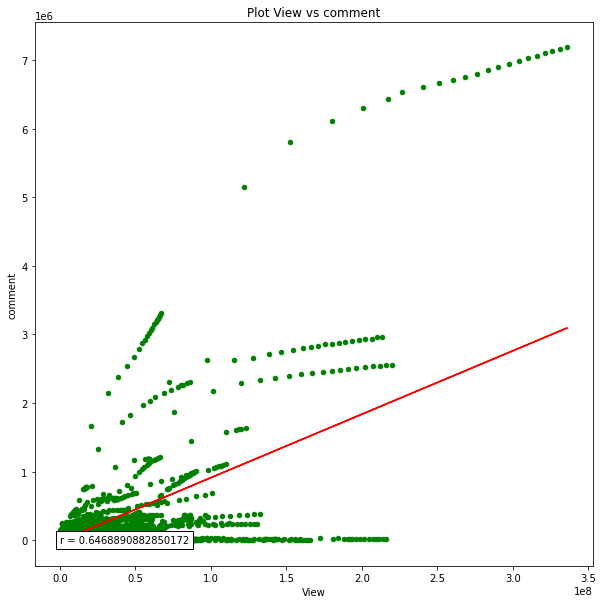

In [175]:
# Scatter plot hubungan view dan comment
df['view'] = df['view'].fillna(0)
df['comment'] = df['comment'].fillna(0)

x = df["view"].values.reshape(-1,1)
y = df["comment"].values.reshape(-1,1)

regresi = LinearRegression().fit(x,y)
hasil = regresi.predict(x)
df.plot(kind='scatter', x='view', y='comment', figsize = (10,10), color='g')
plt.text(2, 0.25, f'r = {df["view"].corr(df["comment"])}', bbox=dict(facecolor='white'), va='center')
plt.xlabel("View")
plt.ylabel("comment")
plt.title("Plot View vs comment")
plt.plot(x,hasil, color="red")
print("Koefisien korelasi antara view dan comment adalah " + str(df["view"].corr(df["comment"])))

Koefisien korelasi antara like dan dislike adalah 0.654910709902318


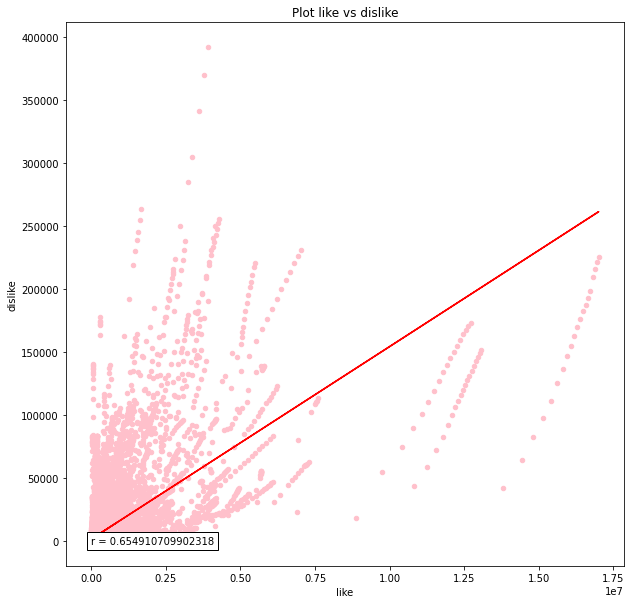

In [176]:
# Scatter plot hubungan like dan dislike
df['like'] = df['like'].fillna(0)
df['dislike'] = df['dislike'].fillna(0)

x = df["like"].values.reshape(-1,1)
y = df["dislike"].values.reshape(-1,1)

regresi = LinearRegression().fit(x,y)
hasil = regresi.predict(x)
df.plot(kind='scatter', x='like', y='dislike', figsize = (10,10), color='pink')
plt.text(2, 0.25, f'r = {df["like"].corr(df["dislike"])}', bbox=dict(facecolor='white'), va='center')
plt.xlabel("like")
plt.ylabel("dislike")
plt.title("Plot like vs dislike")
plt.plot(x,hasil, color="red")
print("Koefisien korelasi antara like dan dislike adalah " + str(df["like"].corr(df["dislike"])))

Koefisien korelasi antara like dan comment adalah 0.7569976905260243


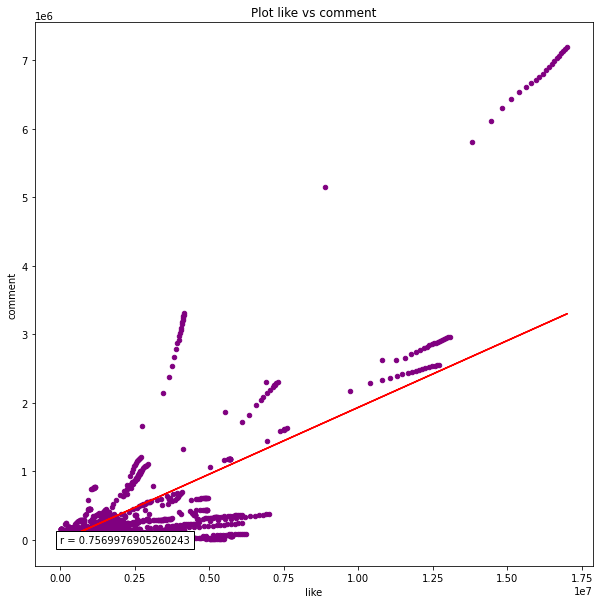

In [177]:
# Scatter plot hubungan like dan comment
df['like'] = df['like'].fillna(0)
df['comment'] = df['comment'].fillna(0)

x = df["like"].values.reshape(-1,1)
y = df["comment"].values.reshape(-1,1)

regresi = LinearRegression().fit(x,y)
hasil = regresi.predict(x)
df.plot(kind='scatter', x='like', y='comment', figsize = (10,10), color='purple')
plt.text(2, 0.25, f'r = {df["like"].corr(df["comment"])}', bbox=dict(facecolor='white'), va='center')
plt.xlabel("like")
plt.ylabel("comment")
plt.title("Plot like vs comment")
plt.plot(x,hasil, color="red")
print("Koefisien korelasi antara like dan comment adalah " + str(df["like"].corr(df["comment"])))

Koefisien korelasi antara dislike dan comment adalah 0.33690317074403364


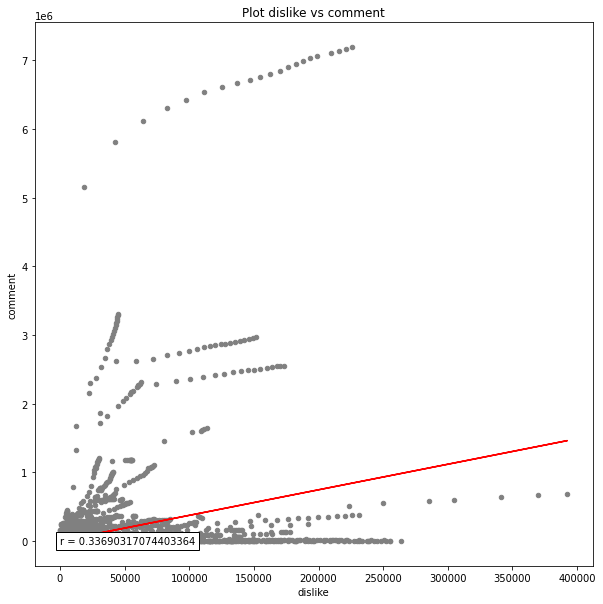

In [178]:
# Scatter plot hubungan dislike dan comment
df['dislike'] = df['dislike'].fillna(0)
df['comment'] = df['comment'].fillna(0)

x = df["dislike"].values.reshape(-1,1)
y = df["comment"].values.reshape(-1,1)

regresi = LinearRegression().fit(x,y)
hasil = regresi.predict(x)
df.plot(kind='scatter', x='dislike', y='comment', figsize = (10,10), color='grey')
plt.text(2, 0.25, f'r = {df["dislike"].corr(df["comment"])}', bbox=dict(facecolor='white'), va='center')
plt.xlabel("dislike")
plt.ylabel("comment")
plt.title("Plot dislike vs comment")
plt.plot(x,hasil, color="red")
print("Koefisien korelasi antara dislike dan comment adalah " + str(df["dislike"].corr(df["comment"])))

Dari beberapa grafik diatas menunjukkan untuk setiap data dengan data lain yaitu berbanding lurus dimana jika data satu meningkat maka data lain juga akan meningkat
<p>Namun dapat dilihat regresi dari grafik plot 'dislike' vs 'comment' paling kecil dibanding dengan yang lain. Hal tersebut menunnjukkan, penduduk indonesia ketika tidak menyukai suatu video, maka cenderung tidak memberikan comment juga.</p>

## **Korelasi**

In [179]:
correlation_list = ['view', 'like', 'dislike', 'comment']
df[correlation_list].corr()

,view,like,dislike,comment
view,1.000000,0.874773,0.800639,0.646889
like,0.874773,1.000000,0.654911,0.756998
dislike,0.800639,0.654911,1.000000,0.336903
comment,0.646889,0.756998,0.336903,1.000000


<p>Tabel diatas merupakan tabel korelasi antar variabel kuantitatif. Korelasi terbesar ditunjukkan oleh like-view dengan nilai r 0.876.</p>
<p>Insight yang didapatkan dari tabel korelasi ini adalah apabila views tinggi, maka kecenderungan likes dan comment akan naik pula. Dan apabila likes atau dislikes tinggi, kecenderungan untuk mendapatkan comment naik juga. </p>
<p>Yang dapat disimpulkan adalah, video trending biasanya viral dengan banyak likes yang berbanding lurus dengan views.</p>

<AxesSubplot:>

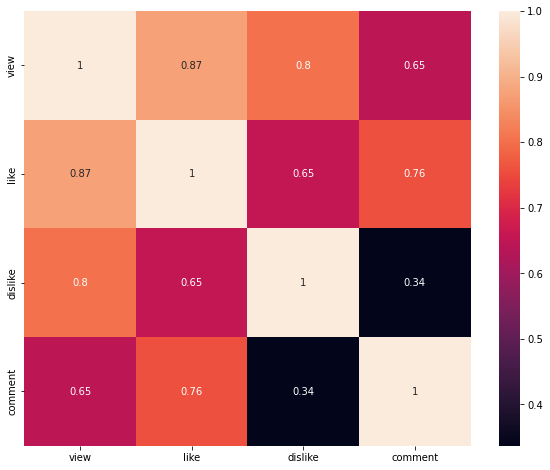

In [180]:
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[correlation_list].corr(), annot=True)

array([[<AxesSubplot:xlabel='view', ylabel='view'>,
        <AxesSubplot:xlabel='like', ylabel='view'>,
        <AxesSubplot:xlabel='dislike', ylabel='view'>,
        <AxesSubplot:xlabel='comment', ylabel='view'>],
       [<AxesSubplot:xlabel='view', ylabel='like'>,
        <AxesSubplot:xlabel='like', ylabel='like'>,
        <AxesSubplot:xlabel='dislike', ylabel='like'>,
        <AxesSubplot:xlabel='comment', ylabel='like'>],
       [<AxesSubplot:xlabel='view', ylabel='dislike'>,
        <AxesSubplot:xlabel='like', ylabel='dislike'>,
        <AxesSubplot:xlabel='dislike', ylabel='dislike'>,
        <AxesSubplot:xlabel='comment', ylabel='dislike'>],
       [<AxesSubplot:xlabel='view', ylabel='comment'>,
        <AxesSubplot:xlabel='like', ylabel='comment'>,
        <AxesSubplot:xlabel='dislike', ylabel='comment'>,
        <AxesSubplot:xlabel='comment', ylabel='comment'>]], dtype=object)

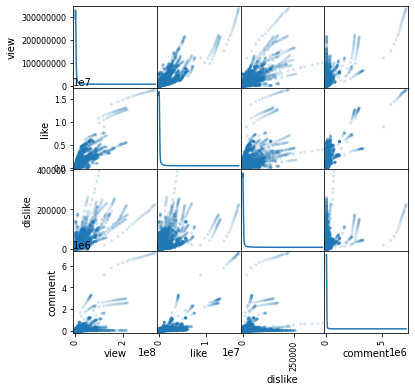

In [181]:
scatter_matrix(df[correlation_list], alpha=0.2, figsize=(6, 6), diagonal='kde')

Diatas adalah heatmap dan scatter plot dari data korelasi yang telah dipaparkan diatas, agar lebih mudah dilihat dalam bentuk visual.